## Generate random sample (classification problem)

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
display(X, y)

array([[ 1.68976749e+00, -1.40824123e+00],
       [ 1.53028665e+00, -1.45984815e+00],
       [-1.17504152e+00, -1.44763291e+00],
       [-2.58539507e+00,  9.63532238e-01],
       [ 1.37224580e+00,  4.40695372e-01],
       [ 7.31936138e-01,  8.49752970e-01],
       [-2.10684207e+00, -1.56005160e-01],
       [-9.36016045e-01,  5.43282487e-01],
       [-1.64699537e+00,  4.93409195e-01],
       [ 4.25361481e-01,  2.41426917e-01],
       [ 8.55819924e-01, -4.30645568e-01],
       [ 1.67660005e+00, -1.71348441e+00],
       [-2.06987792e+00,  2.52602241e-01],
       [-7.95777151e-01,  4.93854713e-02],
       [ 1.77079592e+00,  1.53557656e+00],
       [ 3.65788291e-01,  2.23297154e+00],
       [-5.27587135e-02, -2.18236826e+00],
       [ 5.74030019e-01,  4.47236811e-01],
       [-1.06467498e+00, -7.52371616e-01],
       [ 2.24658823e+00, -1.51455024e+00],
       [-6.28449323e-01, -2.07252229e-01],
       [-1.75906144e+00,  7.58449497e-01],
       [-1.15587568e+00, -1.94994197e+00],
       [ 8.

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0])

In [4]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", size=18)
plt.rcParams["figure.figsize"] = (20, 8)

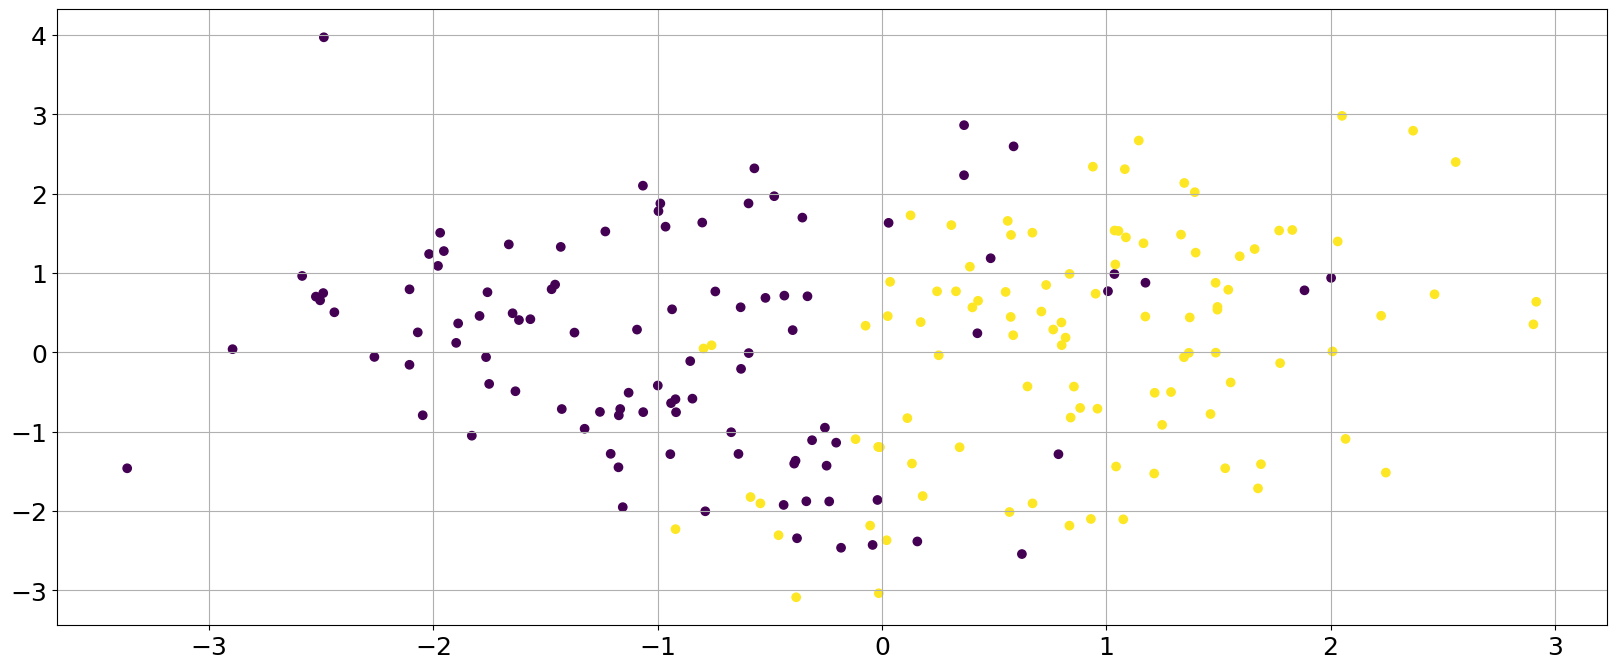

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid()

## Create gradient descent class

In [6]:
def sigmoid(X: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-X))

def logloss(X: np.ndarray, w: np.ndarray, y: np.ndarray) -> float:
    y_proba = sigmoid(X @ w)
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    return -(logloss_0 + logloss_1) / len(y)

def accuracy(X: np.ndarray, w: np.ndarray, y: np.ndarray) -> float:
    y_class = np.where(sigmoid(X @ w) >= 0.5, 1, 0)
    return (y_class == y).sum() / len(y)

class GradientDescent:
    def __init__(self, dimension: int, learning_rate: float = 1e-2, iteration: int = 10000, eps: float = 1e-4) -> None:
        self.w: np.ndarray = np.random.rand(dimension)
        self.learning_rate: float = learning_rate
        self.iteration: int = iteration
        self.eps: float = eps

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> float:
        return X.T @ (sigmoid(X @ self.w) - y)

    def update_weights(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.w - self.learning_rate * self.calc_gradient(X, y)

    def run(self, X: np.ndarray, y: np.ndarray) -> tuple:
        next_w = self.w
        logs = pd.DataFrame(columns=['current-weights', 'next-weights', 'logloss', 'accuracy-metric'])
        for i in np.arange(self.iteration):
            self.w = next_w
            next_w = self.update_weights(X, y)
            log = pd.DataFrame([[self.w, next_w, logloss(X, self.w, y), accuracy(X, self.w, y)]], columns=['current-weights', 'next-weights', 'logloss', 'accuracy-metric'])
            logs = pd.concat([logs, log], sort=False, ignore_index=True)
            if np.linalg.norm(self.w - next_w) <= self.eps:
                break
        return (self.w, logs)

## Create logistic regression class

In [7]:
class LogisticRegression:
    def __init__(self, iteration: int = 10000, eps: float = 1e-4) -> None:
        self.iteration: int = iteration
        self.eps: float = eps
        self.w = None
        self.logs = None
        self.loss: float = 0
        self.accuracy: float = 0

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # add a dummy feature
        X = np.c_[np.ones(len(X)), X]
        descent = GradientDescent(dimension=X.shape[1], learning_rate=1e-2, iteration=self.iteration, eps=self.eps)
        self.w, self.logs = descent.run(X, y)
        self.loss = logloss(X, self.w, y)
        self.accuracy = accuracy(X, self.w, y)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        y_proba = sigmoid(X @ self.w[1:] + self.w[0])
        return np.where(y_proba >= 0.5, 1, 0)

## Split and train data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [11]:
classifier.logs.tail(5)

,current-weights,next-weights,logloss,accuracy-metric
70,"[-0.12824382268967904, 2.2209759107692233, -0....","[-0.1282748120860864, 2.221110144724959, -0.22...",0.338114,0.875
71,"[-0.1282748120860864, 2.221110144724959, -0.22...","[-0.12830322184189621, 2.221233210915847, -0.2...",0.338114,0.875
72,"[-0.12830322184189621, 2.221233210915847, -0.2...","[-0.1283292671904601, 2.2213460398348235, -0.2...",0.338114,0.875
73,"[-0.1283292671904601, 2.2213460398348235, -0.2...","[-0.1283531453219714, 2.2214494842284913, -0.2...",0.338114,0.875
74,"[-0.1283531453219714, 2.2214494842284913, -0.2...","[-0.12837503691058139, 2.2215443256276632, -0....",0.338114,0.875


## Prediction wooooah

In [12]:
prediction, loss, accuracy_score = classifier.predict(X_test), classifier.loss, classifier.accuracy
print(f"Prediction: {prediction}\nOriginal: {y_test}\nLoss: {loss}\nAccuracy metric: {accuracy_score}")

Prediction: [1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0
 1 1 0]
Original: [1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0
 1 0 0]
Loss: 0.33811368510255646
Accuracy metric: 0.875


## one feature test

In [13]:
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, random_state=42, n_clusters_per_class=1, class_sep=0.4)
display(X, y)

array([[-0.52197843],
       [-0.10878456],
       [-0.17301343],
       [-0.1557807 ],
       [-0.50698389],
       [ 0.41991155],
       [ 0.20152241],
       [-0.64209292],
       [ 0.5821095 ],
       [ 0.19914197],
       [ 0.21588896],
       [-0.15774791],
       [ 0.5220902 ],
       [-0.11759094],
       [-0.05680057],
       [ 0.61402272],
       [ 0.86642399],
       [-0.36132302],
       [-0.3234536 ],
       [ 0.84934812],
       [ 0.67886873],
       [-0.48961898],
       [ 0.69443245],
       [ 0.39715802],
       [-0.05158916],
       [ 0.21728527],
       [ 0.21987919],
       [ 0.34604581],
       [ 0.61792759],
       [-0.36270672],
       [-0.30061131],
       [-0.07630562],
       [ 0.25490956],
       [ 1.50465976],
       [-0.22528943],
       [-0.46205704],
       [-0.11508153],
       [-0.4548167 ],
       [-0.32307169],
       [-0.08396821],
       [-0.30712247],
       [-0.52676333],
       [-0.48204625],
       [-0.16671851],
       [-0.1983435 ],
       [-0

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

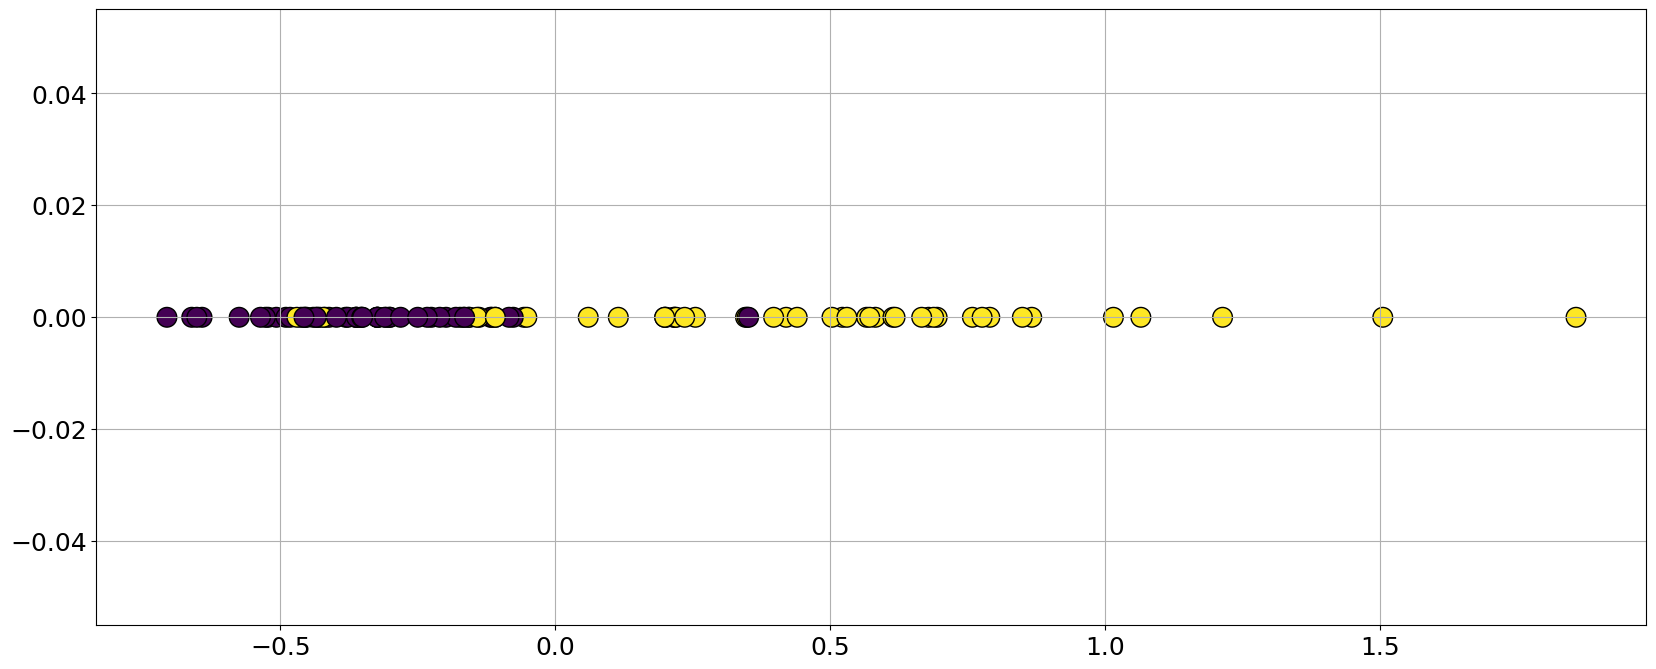

In [14]:
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=200, edgecolors='black')
plt.grid()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [17]:
classifier.logs.tail(5)

,current-weights,next-weights,logloss,accuracy-metric
1373,"[0.8048000158183741, 7.314451641760557]","[0.8048201694773237, 7.31455066749127]",0.300009,0.8875
1374,"[0.8048201694773237, 7.31455066749127]","[0.8048402592136632, 7.314649378702008]",0.300009,0.8875
1375,"[0.8048402592136632, 7.314649378702008]","[0.8048602852321541, 7.314747776403027]",0.300009,0.8875
1376,"[0.8048602852321541, 7.314747776403027]","[0.8048802477368894, 7.314845861601267]",0.300009,0.8875
1377,"[0.8048802477368894, 7.314845861601267]","[0.8049001469312953, 7.314943635300364]",0.300009,0.8875


In [18]:
prediction, loss, accuracy_score, weights = classifier.predict(X_test), classifier.loss, classifier.accuracy, classifier.w
print(f"Prediction: {prediction}\nOriginal: {y_test}\nLoss: {loss}\nAccuracy metric: {accuracy_score}")

Prediction: [0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1]
Original: [0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0]
Loss: 0.30000886920399106
Accuracy metric: 0.8875


In [19]:
y_pred = X @ weights[1:] + weights[0]

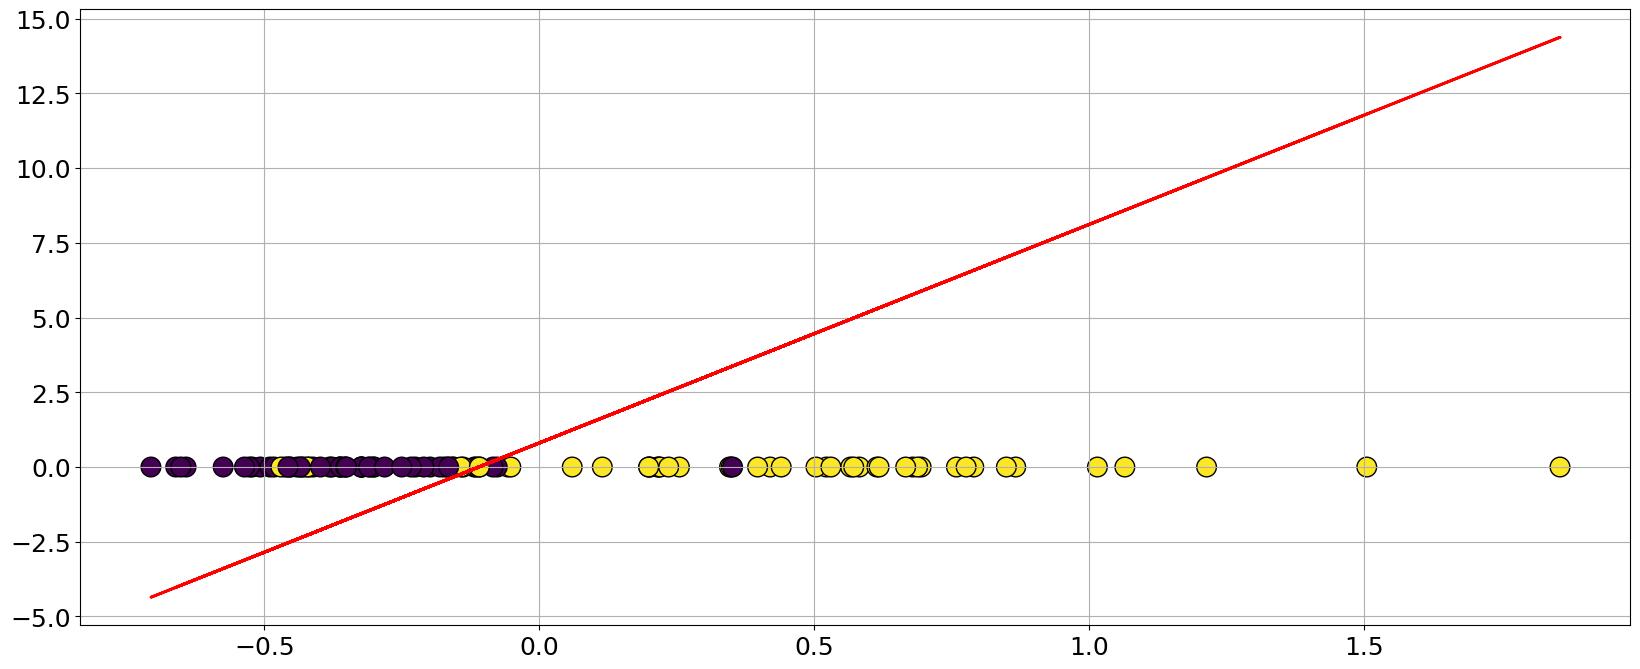

In [20]:
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=200, edgecolors='black')
plt.plot(X, y_pred, linewidth=2, c='red')
plt.grid()